## draw trees

In [2]:
source('drawtrees.R')

In [30]:
setwd('/other/melese')
meta <- read.table('ethiopia_sra.csv',sep=',',
                      header=TRUE,row.names=2)
tree <- read.tree('run3_results/tree.newick')
tree <- root(tree,'ref')
#tree <- drop.tip(tree,'ref')
#meta <- meta[1:10,]

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


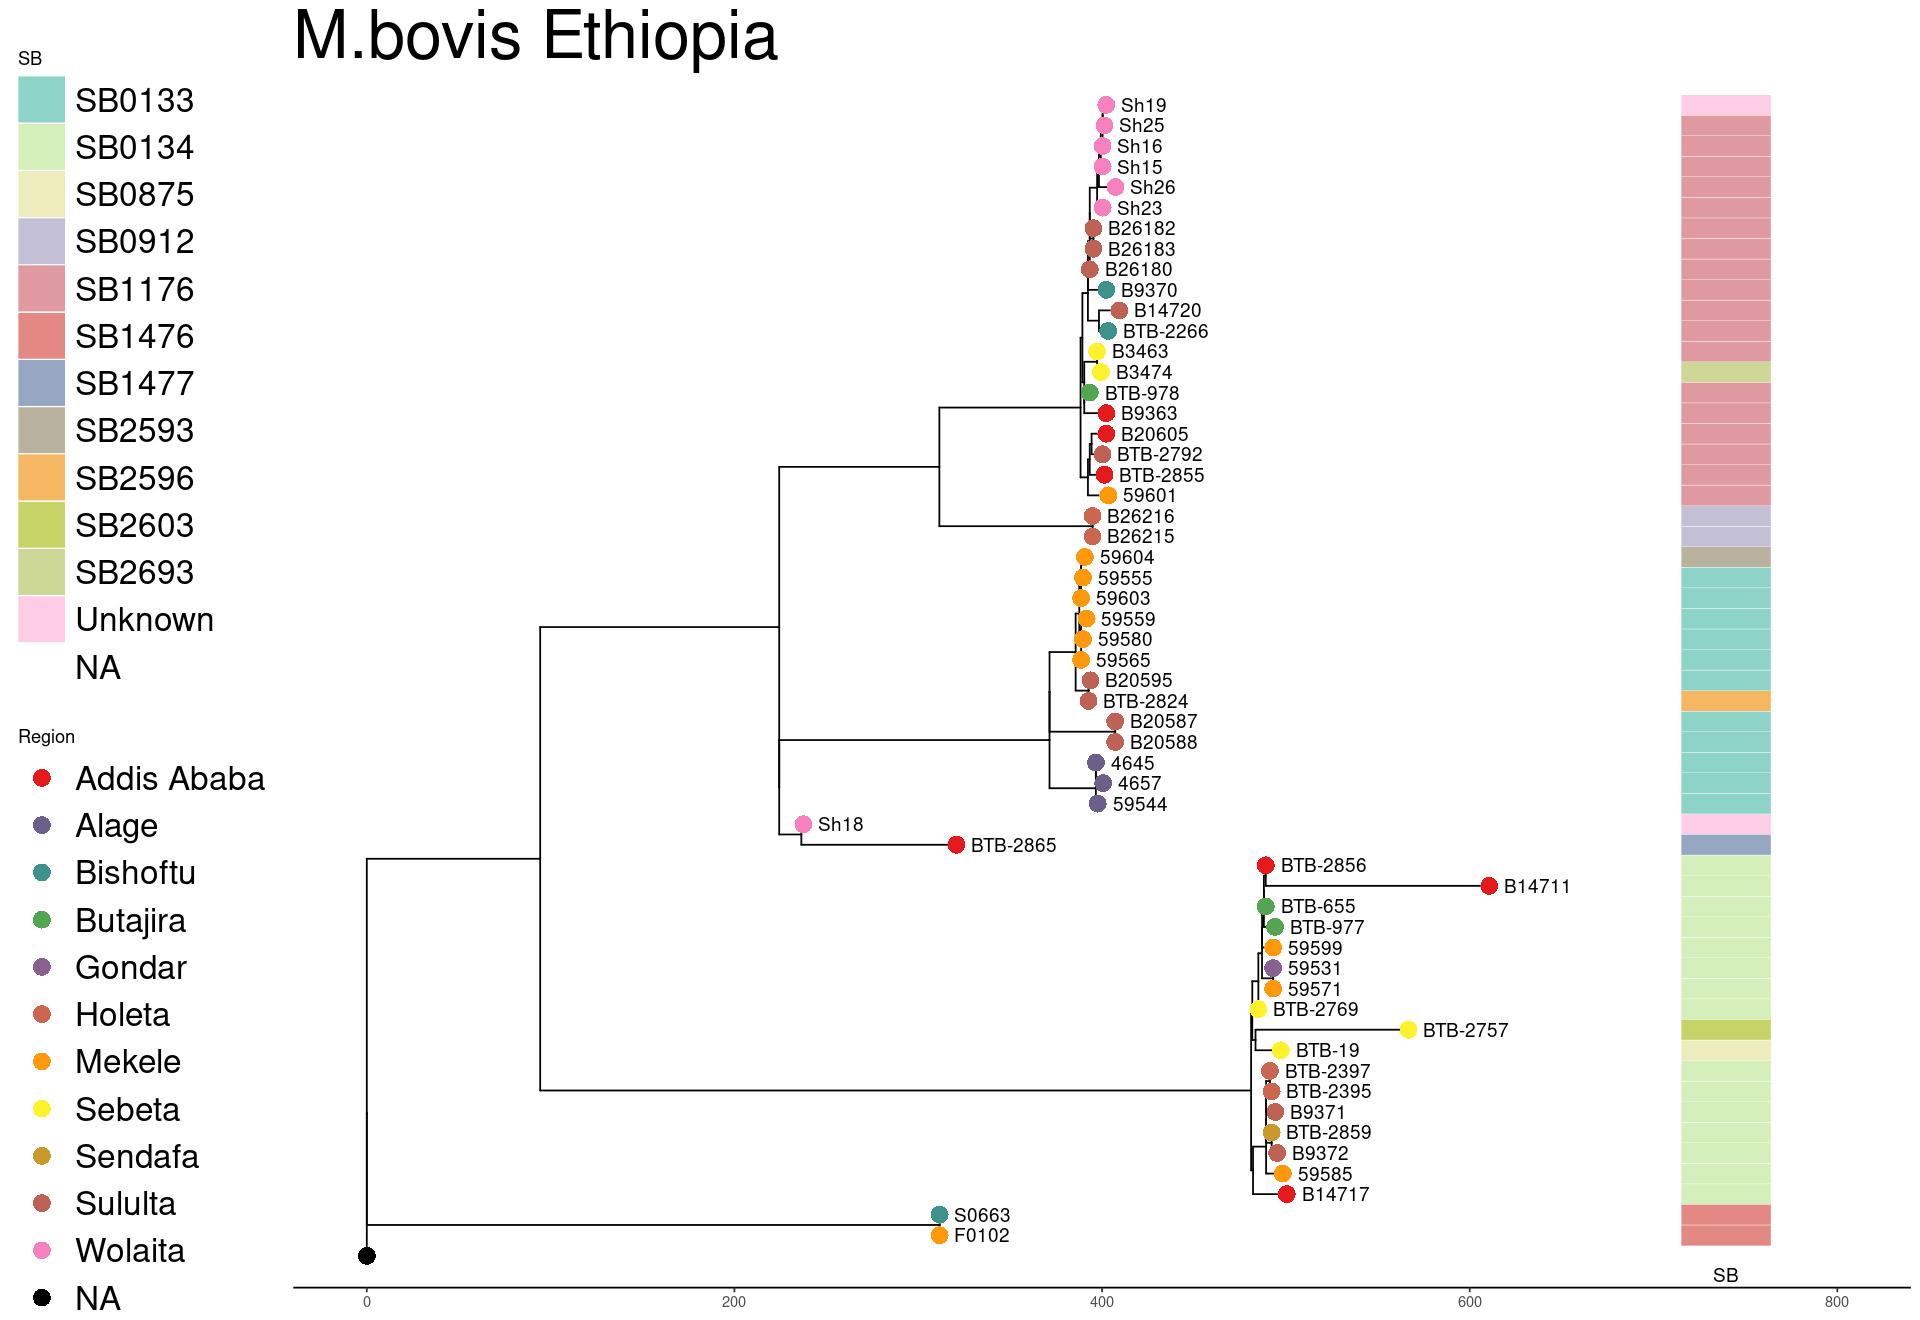

In [31]:
options(repr.plot.width=16, repr.plot.height=11) 
p<-ggplottree(tree, meta, layout='rect', cols=c('Region','SB'),cmaps=c('Set1','Set3'),
           tipsize=5, tiplabel=TRUE, tiplabelsize=4,tipoffset=5, tiplabelcol='Isolate',offset=40) + xlim(NA,800)

p+ggtitle('M.bovis Ethiopia')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


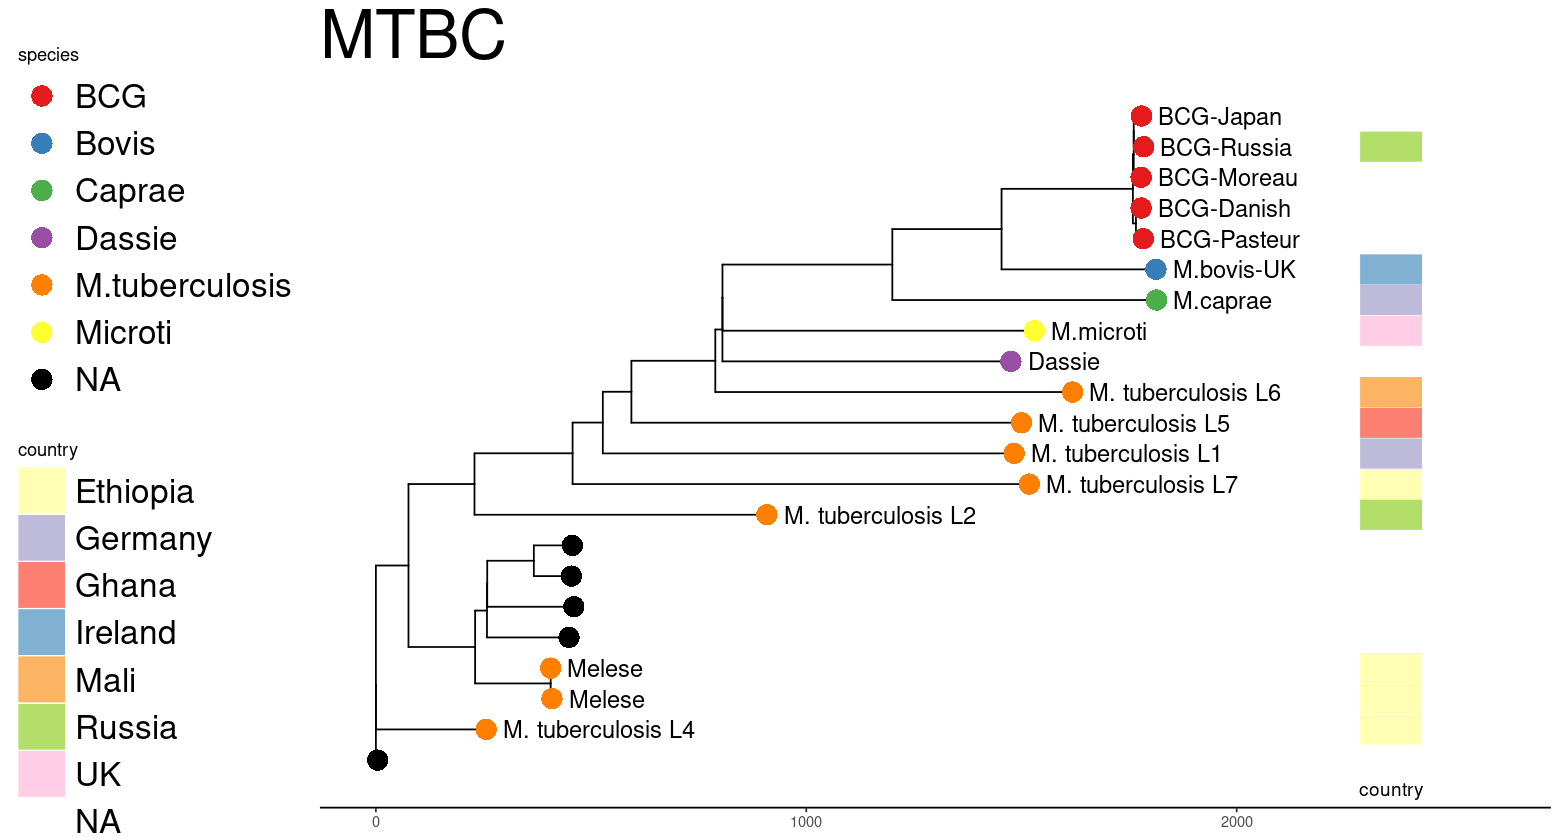

In [6]:
## tb
tbmeta <- read.table('mtbc_metadata.csv',sep=',',
                      header=TRUE,row.names=1)
tree2 <- read.tree('/other/mtbc/results_mtb/tree.newick')
tree2 <- root(tree2,'ref')
options(repr.plot.width=13, repr.plot.height=7) 
p <- ggplottree(tree2, tbmeta, layout='rect', cols=c('species','country'),cmaps=c('Set1','Set3'),offset=200,
           tipsize=6, tiplabel=TRUE, tipoffset=30, tiplabelcol='strain') + xlim(NA,2600)
p + ggtitle('MTBC')

In [ ]:
p <- ggplottree(tree2, tbmeta, layout='rect', cols=c('species','RD1','RD4','RD105','RD149','RD12bov','RD1bcg','RD1mic'),cmaps=c('Set1'),offset=200,
           tipsize=6, tiplabel=TRUE, tipoffset=30, tiplabelcol='strain')# + xlim(NA,2600)
p

In [8]:
names(tbmeta)

[1] "strain"       "species"      "country"      "RD1"          "RD10"        
 [6] "RD105"        "RD108"        "RD11"         "RD110a"       "RD115"       
[11] "RD12"         "RD122"        "RD127"        "RD129"        "RD12bov"     
[16] "RD12can"      "RD12oryx."    "RD13"         "RD139BWa"     "RD14"        
[21] "RD142"        "RD144BWa"     "RD149"        "RD150"        "RD152"       
[26] "RD165"        "RD166"        "RD168BWa"     "RD174"        "RD181"       
[31] "RD182"        "RD182a"       "RD183"        "RD193"        "RD1bcg"      
[36] "RD1mic"       "RD2"          "RD200BWa"     "RD207"        "RD213BWa"    
[41] "RD219"        "RD220BWa"     "RD224ca"      "RD239"        "RD2bcg"      
[46] "RD2seal"      "RD3"          "RD4"          "RD5"          "RD5oryx."    
[51] "RD6"          "RD7"          "RD702"        "RD711"        "RD724"       
[56] "RD726"        "RD750"        "RD761"        "RD8"          "RD9"         
[61] "RDAf2"        "RDPan"        "RDoryx_wag22"

## mycolicibacter

In [70]:
mtree <- read.tree('mycolicibacter/rpoA.newick')
mmeta<- read.csv('mycolicibacter/blast_hits_rpoA.csv',row.names=1)

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


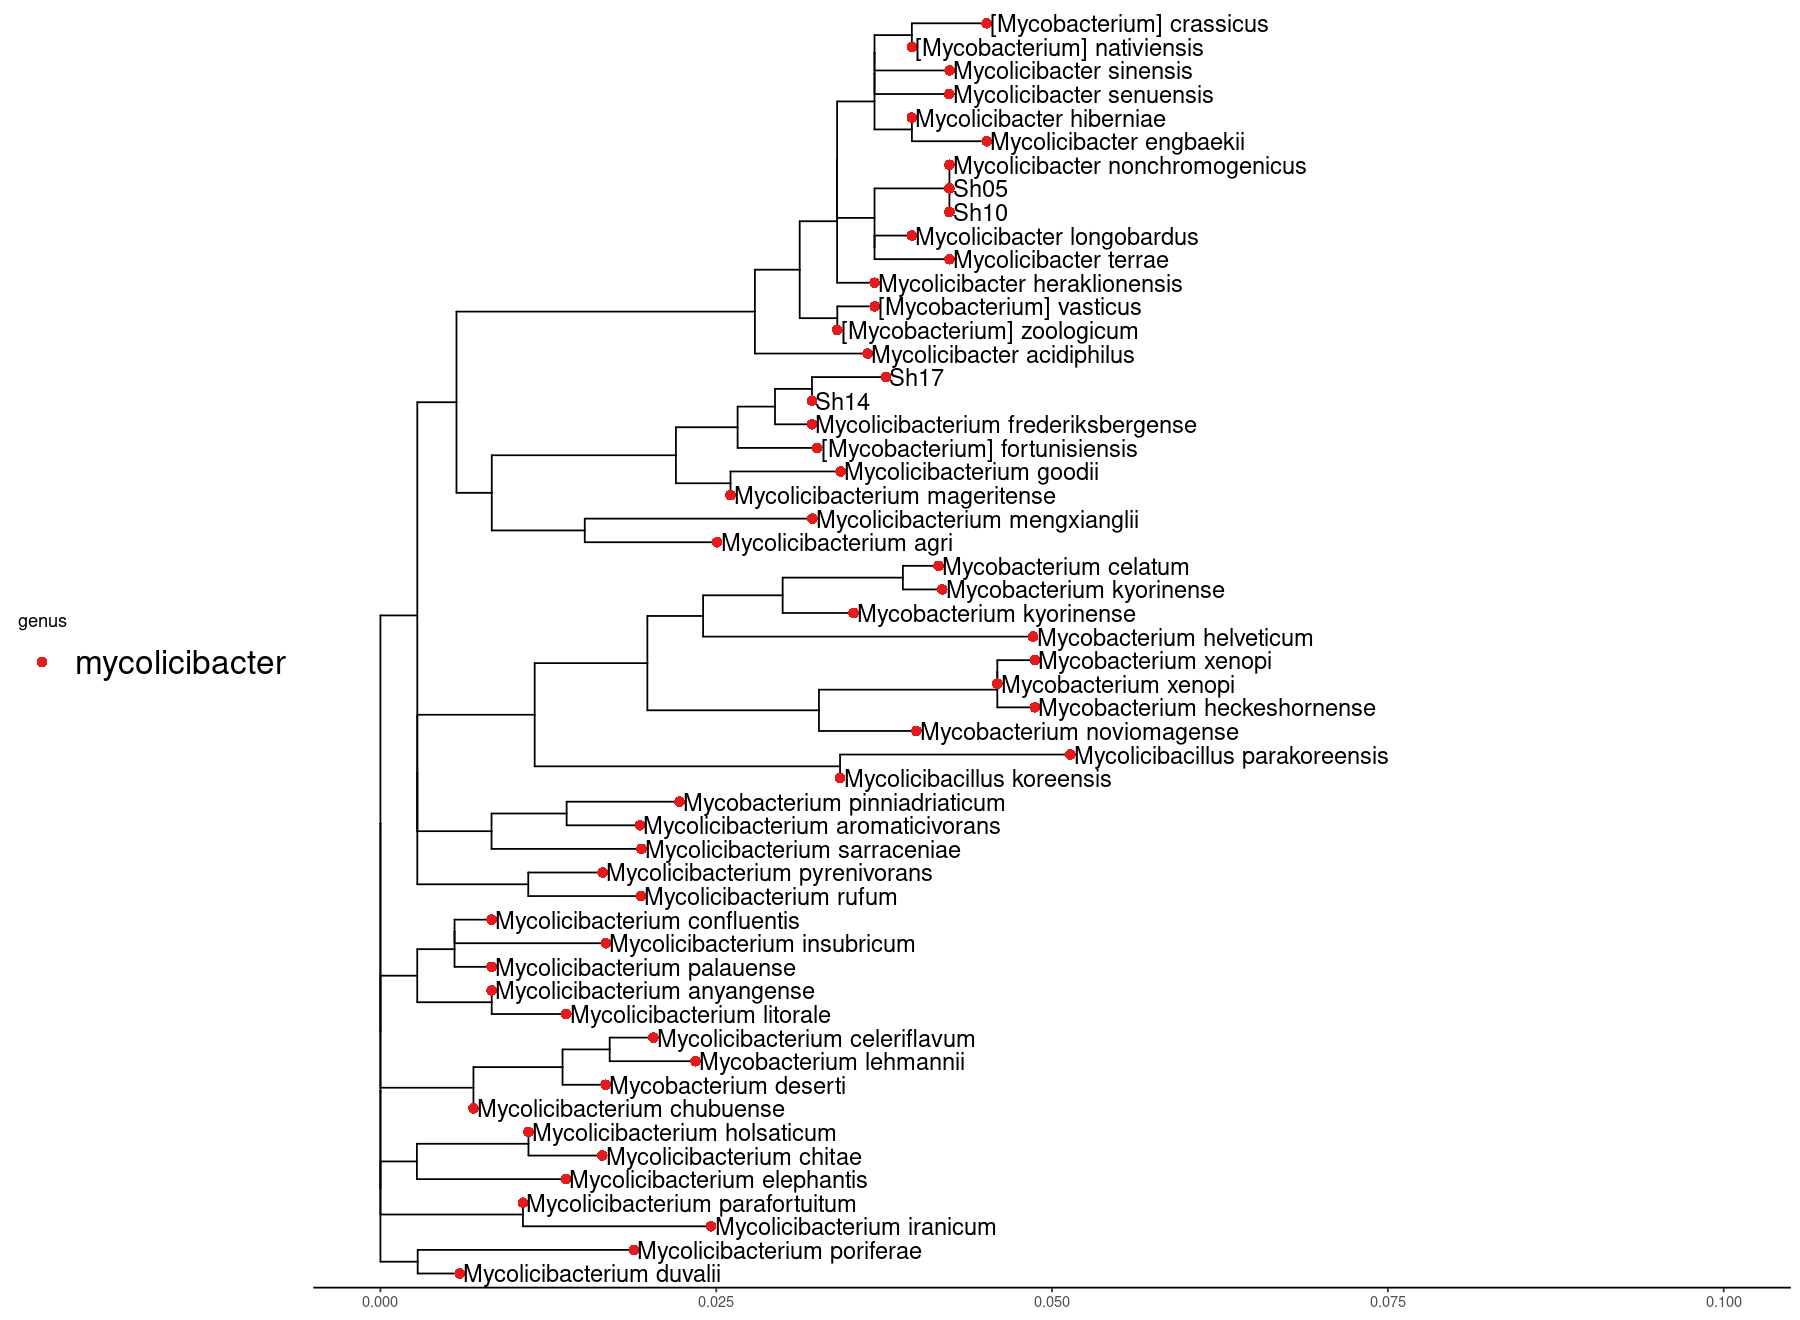

In [72]:
options(repr.plot.width=15, repr.plot.height=11) 
p <- ggplottree(mtree, mmeta, layout='rect', cols=c('genus'), cmaps=('Set1'), 
                tiplabel=TRUE, tiplabelcol='species') + xlim(NA,.1)
p

In [ ]:
stree <- keep.tip(mtree,c('Sh05',''))
p <- ggplottree(stree, mmeta,cols=c('genus'), cmaps=('Set1'), tiplabel=TRUE, tiplabelcol='species', tiplabelsize=10) + xlim(NA,.4)


In [55]:
options(repr.plot.width=12, repr.plot.height=7)
#msaplot(p, fasta="mycolicibacter/rpoA_alt.aln", offset=.1, width=.5)

## Orthofinder tree

In [130]:
otree <- read.tree('mycolicibacter/orthofinder/Species_Tree/SpeciesTree_rooted_node_labels.txt')
ameta<- read.table('mycolicibacter/ncbi_dataset.tsv',row.names=1, header=TRUE,sep='\t')

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 79 rows containing missing values or values outside the scale range (`geom_point_g_gtree()`).”
Warning message:
“Removed 79 rows containing missing values or values outside the scale range (`geom_segment_g_gtree()`).”


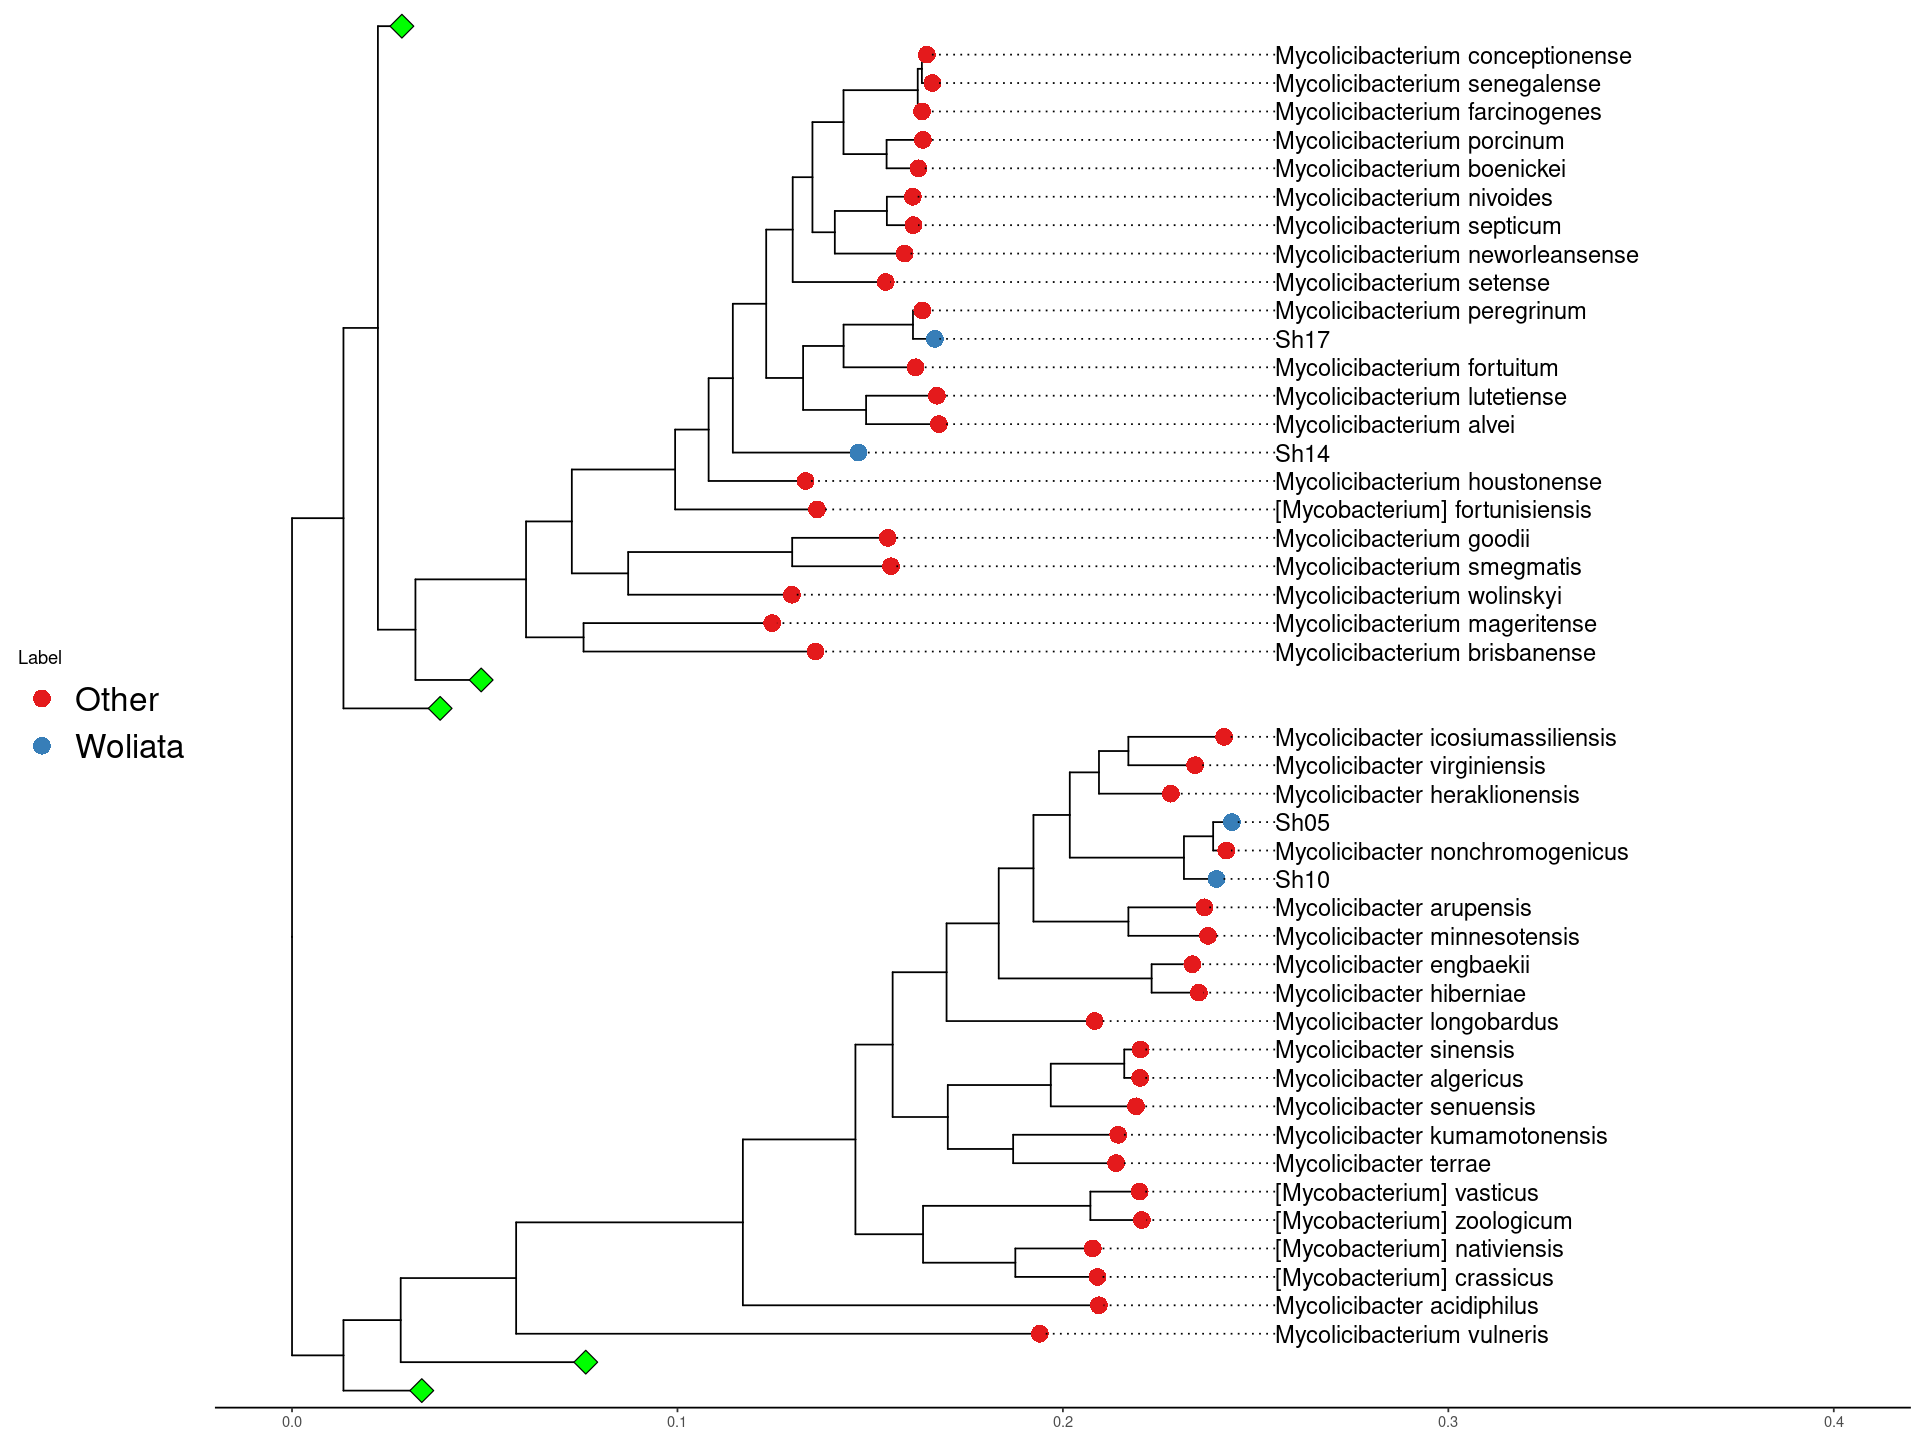

In [189]:
options(repr.plot.width=16, repr.plot.height=12) 
p<-ggplottree(otree, ameta, layout='rect', cols=c('Label'), cmaps=('Set1'),align=TRUE,
           tiplabel=TRUE, tiplabelcol='Organism.Name', tipoffset=.01, tipsize=5,tiplabelsize=5) + xlim(NA,.4)
cnodes<-c(126,157,168,186,220)
for (node in cnodes) {
    p <- collapse(p, node)
}
p <- p + geom_point2(aes(subset=(node %in% cnodes)), shape=23, size=5, fill='green')
#p + geom_nodelab(geom='label', aes(label=node), hjust = 0.3 )
p